# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data.

Let's begin by exploring seaborn's heatmap and clustermap:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
flights = sns.load_dataset('flights')

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


## Heatmap

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [6]:
# Matrix form for correlation data
tips.corr()

C:\Users\PB3\AppData\Local\Temp\ipykernel_3652\3812684929.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


C:\Users\PB3\AppData\Local\Temp\ipykernel_3652\1579789445.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr())


<AxesSubplot: >

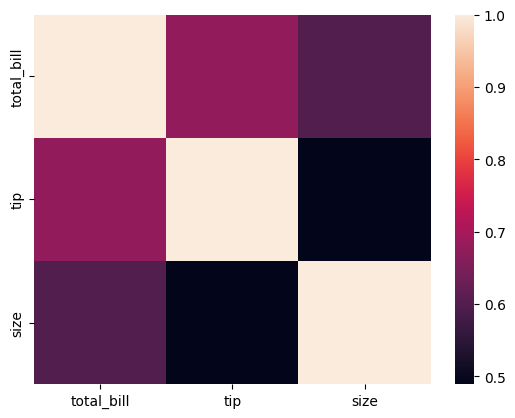

In [7]:
sns.heatmap(tips.corr())

C:\Users\PB3\AppData\Local\Temp\ipykernel_3652\1996064626.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(tips.corr(), cmap="coolwarm", annot=True)


<AxesSubplot: >

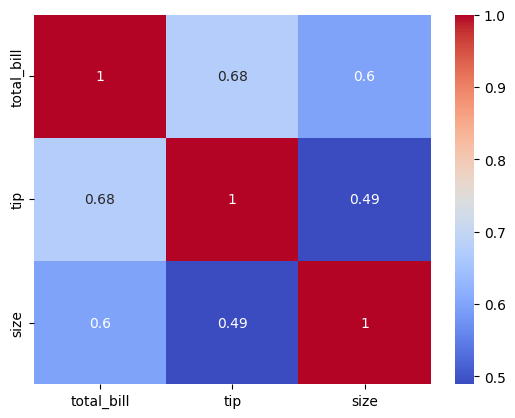

In [9]:
sns.heatmap(tips.corr(), cmap="coolwarm", annot=True)

Or for the flights data:

In [10]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [11]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


In [12]:
pivot_flights = flights.pivot_table(values='passengers',index='month',columns='year')

<AxesSubplot: xlabel='year', ylabel='month'>

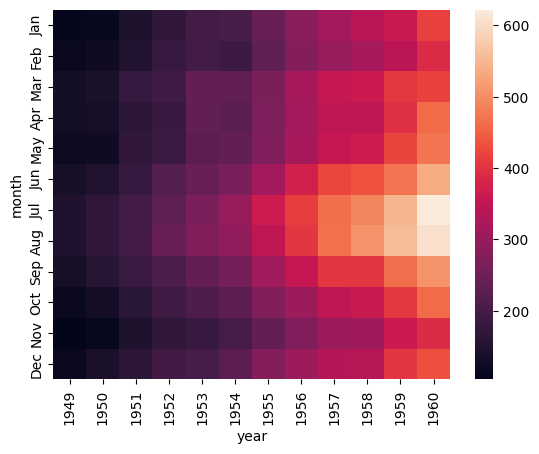

In [13]:
sns.heatmap(pivot_flights)

<AxesSubplot: xlabel='year', ylabel='month'>

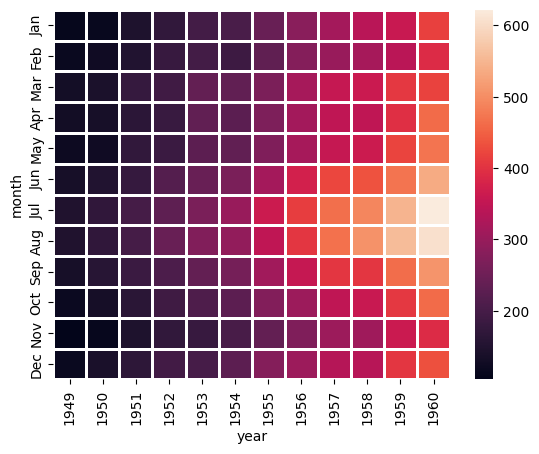

In [15]:
sns.heatmap(pivot_flights, linecolor='white', linewidth=1)

## clustermap

https://seaborn.pydata.org/generated/seaborn.clustermap.html

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

In [17]:
!pip install scipy

     ---------------------------------------- 40.1/40.1 MB 7.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
!pip freeze

asttokens==2.0.8
backcall==0.2.0
colorama==0.4.5
contourpy==1.0.5
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
entrypoints==0.4
executing==1.1.1
fonttools==4.37.4
ipykernel==6.16.1
ipython==8.5.0
jedi==0.18.1
jupyter_client==7.4.3
jupyter_core==4.11.2
kiwisolver==1.4.4
matplotlib==3.6.0
matplotlib-inline==0.1.6
nest-asyncio==1.5.6
numpy==1.23.4
packaging==21.3
pandas==1.5.1
parso==0.8.3
pickleshare==0.7.5
Pillow==9.2.0
prompt-toolkit==3.0.31
psutil==5.9.3
pure-eval==0.2.2
Pygments==2.13.0
pyparsing==3.0.9
python-dateutil==2.8.2
pytz==2022.5
pywin32==304
pyzmq==24.0.1
scipy==1.9.3
seaborn==0.12.1
six==1.16.0
stack-data==0.5.1
tornado==6.2
traitlets==5.5.0
wcwidth==0.2.5


In [20]:
sns.clustermap(pivot_flights)

RuntimeError: clustermap requires scipy to be available

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

In [ ]:
# More options to get the information a little clearer like normalization
